# 🧬 Project 1 [Thyroid Cancer]
### Exploratory Data Analysis + Classification (Random Forest)
##### https://www.kaggle.com/code/h4nzarick/cancer-reccurence-eda-python-plotly
<hr>

New data analytics company has recently opened in my hometown, and started recruiting data scientists to conduct research in public healthcare (PH). One month later, the company had only 1 data analyst (me) due to the “budget constraints”.

The Ministry of Healthcare provided a dataset of patient demographics and blood test results along with Thyroid disease diagnostic, and requested to create a machine learning model aiming to predict the recurrence of well differentiated thyroid cancer.

Surprisingly, the Ministry also requested to share our source code of machine learning model and exploratory data analysis with clear visualizations. It means that I need to document each step to requesters. So, let’s start exploring these to look for useful patterns and possible hypotheses.

### 0. First Steps
**FEATURE DESCRIPTION**
* Age: The age of the patient at the time of diagnosis or treatment.
* Gender: The gender of the patient (male or female).
* Smoking: Whether the patient is a smoker or not.
* Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
* Hx Radiotherapy: History of radiotherapy treatment for any condition.
* Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
* Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
* Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
* Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
* Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
* Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
* T: Tumor classification based on its size and extent of invasion into nearby structures.
* N: Nodal classification indicating the involvement of lymph nodes.
* M: Metastasis classification indicating the presence or absence of distant metastases.
* Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
* Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
* Recurred: Indicates whether the cancer has recurred after initial treatment.


<hr>

### 1. Importing Packages
For **statistics**, I used **pandas, numpy, scikit-learn** and other libraries to handle questions based on the final results.

For **plotting/visualizations** - **matplotlib, seaborn,** and **plotly** are used to display patterns and make it more clear and concise. 

For **classification** - **scikit-learn** is used with several machine learning algorithms

Mainly, Plotly is used for data visualization to enhance data understanding by making graphs more dynamic


In [96]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Remove kernel warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from collections import Counter

import pickle

### 2. Data Description and Understanding
<hr>
In this section, we will perform exploratory data analysis (EDA). This will include examining data types, identifying missing values, detecting duplicates, calculating measures of central tendency, and describing the relationships between variables.

In [97]:
# Load appropriate dataset
data = pd.read_csv("Thyroid_Diff.csv")
df = pd.read_csv("Thyroid_Diff.csv")
df.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


#### 2.1 Data Types

In [98]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

Only 1 numeric and 16 categorical features.

In [99]:
# Take a look at dimension of a dataset
print(f"Dataset contains {df.shape[0]} records with {df.shape[1]} features")

Dataset contains 383 records with 17 features


#### 2.2 Missing Data

In [100]:
# Calculate percentage of missing values in each column
for col in df.columns:
    print(f"{col} - {df[col].isnull().mean()}%")

Age - 0.0%
Gender - 0.0%
Smoking - 0.0%
Hx Smoking - 0.0%
Hx Radiothreapy - 0.0%
Thyroid Function - 0.0%
Physical Examination - 0.0%
Adenopathy - 0.0%
Pathology - 0.0%
Focality - 0.0%
Risk - 0.0%
T - 0.0%
N - 0.0%
M - 0.0%
Stage - 0.0%
Response - 0.0%
Recurred - 0.0%


**Dataset seems to be clear with no missing values**

#### 2.4 Feature Understanding

In [101]:
# Let's see what values each feature consist of
categorical_columns = df.select_dtypes("object").columns.tolist()
for column in categorical_columns:
    if len(df[column].unique().tolist()) > 2:
        print(60 *"=")
        print(f"Values for column `{column}`:\n{df[column].unique().tolist()}")

Values for column `Thyroid Function`:
['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism']
Values for column `Physical Examination`:
['Single nodular goiter-left', 'Multinodular goiter', 'Single nodular goiter-right', 'Normal', 'Diffuse goiter']
Values for column `Adenopathy`:
['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior']
Values for column `Pathology`:
['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell']
Values for column `Risk`:
['Low', 'Intermediate', 'High']
Values for column `T`:
['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b']
Values for column `N`:
['N0', 'N1b', 'N1a']
Values for column `Stage`:
['I', 'II', 'IVB', 'III', 'IVA']
Values for column `Response`:
['Indeterminate', 'Excellent', 'Structural Incomplete', 'Biochemical Incomplete']


Some of the columns contain abbreviation, for example T1a tumor classification, so further transformation of a dataset is required

In [102]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Rename columns
df.rename(columns={
    "hx_smoking": "smoking_history",
    "hx_radiothreapy": "radiotherapy_history",
    "t": "tumor",
    "n": "lymph_node",
    "m": "cancer_metastasis"
}, inplace=True)

# Ensure the columns exist before performing replace
if "stage" in df.columns:
    df["stage"].replace({
        "I": "First Stage",
        "II": "Second Stage",
        "III": "Third Stage",
        "IVA": "Forth Stage A",
        "IVB": "Forth Stage B"
    }, inplace=True)

if "adenopathy" in df.columns:
    df["adenopathy"].replace({
        "Right": "Adenopathy on right neck region",
        "Left": "Adenopathy on left neck region",
        "Extensive": "Extensive Adenopathy",
        "Bilateral": "Bilateral Adenopathy",
        "Posterior": "Posterior Adenopathy"
    }, inplace=True)

if "tumor" in df.columns:
    df["tumor"].replace({
        "T1a": "Tumor is 1 cm or smaller",
        "T1b": "Tumor is larger than 1 cm but less than 2 cm",
        "T2": "Tumor is larger than 2 cm but smaller than 4 cm",
        "T3a": "Tumor is larger than 4 cm",
        "T3b": "Tumor is beyond thyroid",
        "T4a": "Tumor spread beyond thyroid",
        "T4b": "Tumor spread drastically"
    }, inplace=True)

if "lymph_node" in df.columns:
    df["lymph_node"].replace({
        "N0": "No evidence of cancer",
        "N1a": "Cancer spread to lymph nodes",
        "N1b": "Cancer spread beyond central compartment"
    }, inplace=True)

if "cancer_metastasis" in df.columns:
    df["cancer_metastasis"].replace({
        "M0": "No spread",
        "M1": "Spread beyond"
    }, inplace=True)

df.head()


,age,gender,smoking,smoking_history,radiotherapy_history,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,tumor,lymph_node,cancer_metastasis,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,Tumor is 1 cm or smaller,No evidence of cancer,No spread,First Stage,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,Tumor is 1 cm or smaller,No evidence of cancer,No spread,First Stage,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,Tumor is 1 cm or smaller,No evidence of cancer,No spread,First Stage,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,Tumor is 1 cm or smaller,No evidence of cancer,No spread,First Stage,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,Tumor is 1 cm or smaller,No evidence of cancer,No spread,First Stage,Excellent,No


In [103]:
df.describe(include=["object"]).transpose()

,count,unique,top,freq
gender,383,2,F,312
smoking,383,2,No,334
smoking_history,383,2,No,355
radiotherapy_history,383,2,No,376
thyroid_function,383,5,Euthyroid,332
physical_examination,383,5,Multinodular goiter,140
adenopathy,383,6,No,277
pathology,383,4,Papillary,287
focality,383,2,Uni-Focal,247
risk,383,3,Low,249


#### 2.4 Visualizations

In [104]:
# Create custom color palette that will be applied to some of the plots
custom_color_map = {'setosa': 'lightcyan', 
                    'versicolor': 'royalblue',
                    'virginica': 'darkblue'}

In [105]:
# Create a histogram plot of age distribution by gender
fig = px.histogram(
    df, 
    x="age", 
    title="Age Distribution by Gender", 
    marginal="box", 
    color="gender",
    nbins=60,
    color_discrete_map=custom_color_map
)

# Update layout properties of the figure
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': "Age Distribution by Gender",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Display the figure
fig.show()

**Observations**
* Study group can be considered pretty young with the highest number of patients lying in the range of 25-40 age group (adult)
* The age distribution for females shows a higher count in the 20-25 age range.
* The age distribution for males shows a higher count in the 30-35 age range.
* In both cases for females and males, distribution is uniform with several peaks, but a little bit skewed to the left, demonstrating that there are more young patients than elderly ones

In [106]:
# Create a pie chart of gender distribution
fig = px.pie(
    values=df["gender"].value_counts(),
    names=df["gender"].map({"F": "Female", "M": "Male"}).unique().tolist(),
    color_discrete_sequence=["purple", "royalblue"],
    title="Gender Distribution",
    hole=0.3
)

# Update traces to show label and percent inside the pie slices
fig.update_traces(
    textposition="inside", 
    textinfo="label+percent"
)

# Update layout properties of the figure
fig.update_layout(
    width=500, 
    height=400, 
    title={
        "xanchor": "center",
        "yanchor": "top",
        "x": 0.5,
        "y": 0.9
    }
)

# Display the figure
fig.show()


**Observations:**
* Chart shows that the number of females is significantly higher for females, probably further observations based on the gender can be biased due to the imbalancy between two classes

In [107]:
# Create subplots with specified row and column layout
fig = make_subplots(
    rows=1, 
    cols=3, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'xy'}]],
    subplot_titles=[
        "Distribution of Smokers", 
        "Distribution of Ex-Smokers", 
        "Distribution of Smokers by Age"
    ]
)

# Add pie chart for smoking distribution
fig.add_trace(
    go.Pie(
        values=df["smoking"].value_counts(), 
        labels=df["smoking"].unique().tolist(),
        hole=0.3, 
        textinfo="label+percent",
        textposition="inside",
        marker=dict(colors=px.colors.qualitative.Alphabet)
    ), 
    row=1, 
    col=1
)

# Add pie chart for smoking history distribution
fig.add_trace(
    go.Pie(
        values=df["smoking_history"].value_counts(), 
        labels=df["smoking_history"].unique().tolist(),
        hole=0.3, 
        textinfo="label+percent",
        textposition="inside",
        marker=dict(colors=px.colors.qualitative.Alphabet)
    ), 
    row=1, 
    col=2
)

# Add box plot for smoking distribution by age
fig.add_trace(
    go.Box(
        x=df["smoking"], 
        y=df["age"]
    ), 
    row=1, 
    col=3
)

# Update layout to hide legends
fig.update_layout(
    showlegend=False,
    width=1000
)

# Display the figure
fig.show()

**Observations:**
* Number of non smokers is significantly higher than smokers
* Even more people had never smoked before
* Smokers tend to be older than non-smokers
* Median age of smokers is ~ 52 years
* Median age of non smokers is ~ 36 years
* Patients under 20 do not smoke


In [108]:
# Create new columns for ex-smoker and smoker status based on smoking history
df['ex_smoker'] = ((df['smoking'] == 'No') & (df['smoking_history'] == 'Yes')).map({True: "Yes", False: "No"})
df['smoker'] = ((df['smoking'] == 'No') & (df['smoking_history'] == 'No')).map({False: "Yes", True: "No"})

# Histogram for risk of cancer among current smokers
fig = px.histogram(
    df, 
    x="risk", 
    color="smoking", 
    barmode='group',
    title="Risk of Cancer Among Current Smokers",
    nbins=50,
    color_discrete_map={
        'setosa': 'lightcyan', 
        'versicolor': 'royalblue',
        'virginica': 'darkblue'
    }
)

# Update layout properties of the figure
fig.update_layout(
    width=600, 
    height=400,
    yaxis_title='Number',
    xaxis_title='Risk',
    title={
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5,
        'y': 0.9
    }
)

# Display the figure
fig.show()

# Histogram for risk of cancer among ex-smokers
fig = px.histogram(
    df, 
    x="risk", 
    color="ex_smoker", 
    barmode='group',
    title="Risk of Cancer Among Ex-Smokers",
    nbins=50,
    color_discrete_map={
        'setosa': 'lightcyan', 
        'versicolor': 'royalblue',
        'virginica': 'darkblue'
    }
)

# Update layout properties of the figure
fig.update_layout(
    width=600, 
    height=400,
    yaxis_title='Number',
    xaxis_title='Risk',
    title={
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5,
        'y': 0.9
    }
)

# Display the figure
fig.show()

# Histogram for risk of cancer among patients with radiotherapy treatment
fig = px.histogram(
    df, 
    x="risk", 
    color="radiotherapy_history", 
    barmode='group',
    title="Risk of Cancer Among Patients with Radiotherapy Treatment",
    nbins=50,
    color_discrete_map={
        'setosa': 'lightcyan', 
        'versicolor': 'royalblue',
        'virginica': 'darkblue'
    }
)

# Update layout properties of the figure
fig.update_layout(
    width=600, 
    height=400,
    yaxis_title='Number',
    xaxis_title='Risk',
    title={
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5,
        'y': 0.9
    }
)

# Display the figure
fig.show()


**Observations:**
* Risk of cancer is high among smokers and low among non smokers
* Risk of cancer decreases for those who quitted from smoking
* Raiotherapy does not significantly affect on risk increase

In [109]:
# Create a histogram of thyroid function status across patients by gender
fig = px.histogram(
    df, 
    x="thyroid_function",
    color="gender",
    color_discrete_map=dict(colors=px.colors.qualitative.Alphabet),
    title="Status of Thyroid Function Across Patients by Gender"
)

# Update layout properties of the figure
fig.update_layout(
    xaxis_title="Thyroid Function",
    yaxis_title="Number"
)

# Display the figure
fig.show()

**Observations:**
* Euthyroid is the most common status 
* There are small differences in the counts for other thyroid function categories between genders.

Swarmplot is not in plotly_express library, hence I decided to create jitter function to neatly place dots for each category

In [110]:
# Function to add jitter (random noise) to a feature
def jitter(feature, noise):
    return feature + noise * (np.random.random(len(feature)) - 0.4)

# Get unique thyroid function categories
thyroid_function_category = df.thyroid_function.unique().tolist()

# Map thyroid function categories to numbers and add jitter
df["jittered_thyroid_function"] = jitter(
    df["thyroid_function"].map(dict(zip(thyroid_function_category, range(1, len(thyroid_function_category) + 1)))), 
    0.5
)

# Create a scatter plot of jittered thyroid function vs. age, colored by thyroid function status
fig = px.scatter(
    df, 
    x="jittered_thyroid_function", 
    y="age", 
    color="thyroid_function", 
    title="Status of Thyroid Functions Among Patients of Different Age"
)

# Update layout properties of the figure
fig.update_layout(
    xaxis_title="Thyroid Function",
    yaxis_title="Age",
    height=600, 
    width=1100,
    showlegend=False
)

# Update x-axis to show thyroid function categories
fig.update_xaxes(
    tickvals=list(range(1, len(thyroid_function_category) + 1)), 
    ticktext=thyroid_function_category
)

# Display the figure
fig.show()

In [111]:
# Let's see how many people with different thyroid functions get cancer after remission
df["number_recurred"] = 1

# Pivot table can easily solve such a problem
ptable = pd.pivot_table(df, values="number_recurred", 
                        index="thyroid_function",
                        columns="recurred",
                        aggfunc={"number_recurred": "count"},
                        fill_value=0)
ptable

recurred,No,Yes
thyroid_function,,
Clinical Hyperthyroidism,17,3
Clinical Hypothyroidism,10,2
Euthyroid,234,98
Subclinical Hyperthyroidism,5,0
Subclinical Hypothyroidism,9,5


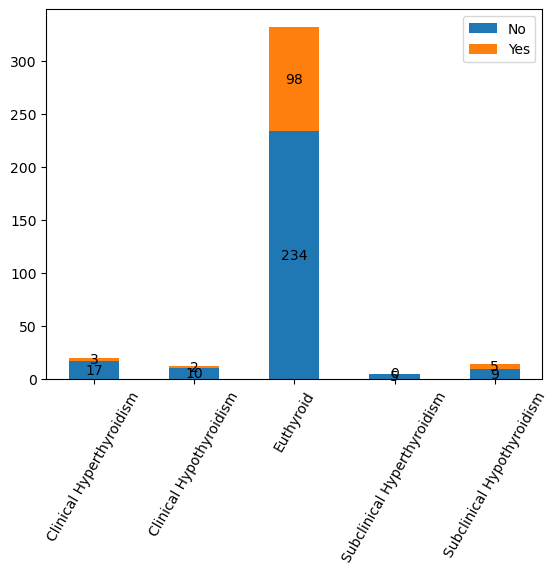

In [112]:
# Create a bar plot with stacked bars
fig, ax = plt.subplots()
bottom = np.zeros(5)

# Iterate through the ptable dictionary and plot each bar
for recurred, no in ptable.items():
    p = ax.bar(no.index, no.values, width=0.5, label=recurred, bottom=bottom)
    bottom += no
    ax.bar_label(p, label_type="center")

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=60)

# Add legend to the plot
plt.legend(loc="upper right")

# Display the plot
plt.show()

**Observations:**
* Euthyroid function demonstrates the highest level of recurrence in terms of count
* Subclinical Hypothyroidism has slightly higher percentage of cancer recurrence (~55%)
* Cancer is not recurred with Sublinical Hyperthyroidism thyroid function

In [113]:
# Insted of typical box plots, violin plots suit better, when dataset is relatively small as in our case (383 records)

# Map physical examination categories to simplified categories
df["physical_examination_cat"] = df["physical_examination"].map({
    "Multinodular goiter": "Multinodular goiter",
    "Single nodular goiter-right": "Singlenodular goiter",
    "Single nodular goiter-left": "Singlenodular goiter",
    "Normal": "Normal",
    "Diffuse goiter": "Normal"
})

# Create a violin plot of physical examination findings across different age groups, colored by gender
fig = px.violin(
    df, 
    x="physical_examination_cat", 
    y="age", 
    title="Physical Examination Findings Across Different Age Groups", 
    color="gender",
    points="all"
)

# Update layout properties of the figure
fig.update_layout(
    xaxis_title="Physical Examination Results",
    yaxis_title="Age"
)

# Display the figure
fig.show()


In [114]:
# Create subplots with specified row and column layout
fig = make_subplots(
    rows=2, cols=1, 
    specs=[[{'type': 'domain'}], [{'type': 'domain'}]]
)

# Add pie chart for adenopathy percentage among females
fig.add_trace(go.Pie(
    labels=df["adenopathy"].unique().tolist(),
    values=df[df["gender"] == "F"]["adenopathy"].value_counts().tolist(),
    title="Adenopathy Percentage Among Females",
    textinfo="percent",
    textposition="inside",
    pull=[0, 0.1] 
), row=1, col=1)

# Add pie chart for adenopathy percentage among males
fig.add_trace(go.Pie(
    labels=df["adenopathy"].unique().tolist(),
    values=df[df["gender"] == "M"]["adenopathy"].value_counts().tolist(),
    title="Adenopathy Percentage Among Males",
    textinfo="percent",
    textposition="inside",
    pull=[0, 0.1, 0.2]
), row=2, col=1)

# Update layout properties of the figure
fig.update_layout(
    title_text="Adenopathy Percentage by Gender",
    height=1200 
)

# Display the figure
fig.show()


In [115]:
# Get unique values of 'adenopathy' column and convert to list
adenopathy_category = df["adenopathy"].unique().tolist()

# Map each unique 'adenopathy' value to a jittered value between 0 and 1
# Add jittered values as a new column 'jittered_adenopathy' to the DataFrame
df['jittered_adenopathy'] = jitter(df["adenopathy"].map(dict(zip(adenopathy_category, range(1, len(adenopathy_category) + 1)))), 0.5)

# Create a scatter plot 
fig = px.scatter(df, x="jittered_adenopathy", 
                 y="age", 
                 color="adenopathy", 
                 title="Adenopathy Distribution by Age",
                 color_discrete_map={'setosa': 'lightcyan', 
                                     'versicolor': 'royalblue',
                                     'virginica': 'darkblue'})

# Update layout of the plot
fig.update_layout(
    title_text='Adenopathy Distribution by Age',
    yaxis_title='Age',
    xaxis_title="Adenopathy",
    width=1000,
    height=600,
    showlegend=False,
    title={
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5,
        'y': 0.9
    }
)

# Update x-axis ticks with actual 'adenopathy' categories
fig.update_xaxes(tickvals=list(range(1, len(adenopathy_category) + 1)), 
                 ticktext=adenopathy_category,
                 tickangle=-20)

# Show the plot
fig.show()


In [116]:
# Assign a value of 1 to the 'number_smokers' column for all rows
df["number_smokers"] = 1

# Create a pivot table to compare the number of smokers with different adenopathy statuses
pivot_table = pd.pivot_table(df[df["adenopathy"] != "No"], 
                             values='number_smokers', 
                             index='adenopathy', 
                             columns='smoker', 
                             aggfunc={'number_smokers': "count"}, 
                             fill_value=0)

# Reset the index of the pivot table
pivot_table = pivot_table.reset_index()

# Melt the pivot table to convert it to long format
pivot_table_melted = pivot_table.melt(id_vars='adenopathy', 
                                      var_name='smoker', 
                                      value_name='count')

# Create a grouped bar plot
fig = px.bar(pivot_table_melted, 
             x='adenopathy', 
             y='count', 
             color='smoker', 
             barmode='group',
             title='Comparison of Number of Smokers with Different Adenopathy Status',
             labels={'adenopathy': 'Adenopathy Status', 
                     'count': 'Count'})

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=-20)

# Show the plot
fig.show()

**Observations**
* Relative number of smokers with Extensive Adenopathy is the highest among others
* Smoking has an effect on the presence of the enlarged lymph nodes as it can be seen from the distributions

In [117]:
# Assign a value of 1 to the 'number_pathology_categories' column for all rows
df["number_pathology_categories"] = 1

# Create a pivot table to compare the number of pathology categories with different adenopathy statuses
pivot_table = pd.pivot_table(df[df["adenopathy"] != "No"], 
                             values='number_pathology_categories', 
                             index='adenopathy', 
                             columns='pathology', 
                             aggfunc={'number_pathology_categories': "count"}, 
                             fill_value=0)

# Reset the index of the pivot table
pivot_table = pivot_table.reset_index()

# Melt the pivot table to convert it to long format
pivot_table_melted = pivot_table.melt(id_vars='adenopathy', 
                                      var_name='pathology', 
                                      value_name='count')

# Create a stacked bar plot 
fig = px.bar(pivot_table_melted, 
             x='adenopathy', 
             y='count', 
             color='pathology', 
             barmode='stack',
             title='Comparison Adenopathy Status (except of absence of it) with Different Thyroid Cancer Types',
             labels={'adenopathy': 'Adenopathy Status', 
                     'count': 'Count'})

# Adjust legend position
fig.update_layout(legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.01),
                  width=1100)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=0)

# Show the plot
fig.show()

**Observations:**
* Papillary cancer type is the most common 
* Follicular cancer type is the the most rare
* Patients with Posterior Adenopathy have only papillary cancer

In [118]:
# Create subplots with 3 rows and 1 column, each subplot representing a different classification
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=["Tumor Classification", "Lymph Node Classification", "Cancer Metastasis Classification"])

# Add box plots for each classification to the respective subplot
fig.add_trace(go.Box(x=df["tumor"], y=df["age"]), row=1, col=1)
fig.add_trace(go.Box(x=df["lymph_node"], y=df["age"]), row=2, col=1)
fig.add_trace(go.Box(x=df["cancer_metastasis"], y=df["age"]), row=3, col=1)

# Update layout of the figure
fig.update_layout(
    title_text='Box Plots of Classifications by Age',
    yaxis_title='Age',
    width=1000,
    height=1500,
    showlegend=False,
    title={
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5,
        'y': 0.97
    }
)

# Rotate x-axis ticks for better readability
fig.update_xaxes(tickangle=-20)

# Show the plot
fig.show()

**Observations:**
* Complication of metastasis and tumor size comes up with age
* Lymph node classification does not affected by age distribution

In [119]:
# Create a box plot
fig = px.box(df, x="stage", 
             y="age", 
             color="stage",
             notched=False,
             color_discrete_sequence=px.colors.qualitative.Set1,
             title="Age Distribution by Cancer Stages")

# Update layout of the figure
fig.update_layout(width=1000,
                  height=600,
                  title={
                      'text': "Age Distribution by Cancer Stages",
                      'xanchor': 'center',
                      'yanchor': 'top',
                      'y': 0.9,
                      'x': 0.45
                  })

# Show the plot
fig.show()

**Observations:**
* Cancer Stage development depends on age of the patients (positive linear correlation)

In [120]:
# Create subplots with 1 row and 5 columns, each subplot representing a different cancer stage
fig = make_subplots(rows=1, cols=5, 
                    specs=[[{'type': 'pie'} for _ in range(5)]], 
                    subplot_titles=[stage for stage in df["stage"].unique()])

# Iterate over unique cancer stages
for i, stage in enumerate(df["stage"].unique(), start=1):

    # Filter DataFrame for the current stage
    stage_df = df[df["stage"] == stage]
    
    # Group by gender and calculate the count
    grouped_df = stage_df.groupby("gender").size().reset_index(name="count")

    # Assign labels and values for the pie chart
    labels = grouped_df['gender'].map({"M": "Male", "F": "Female"})
    values = grouped_df['count']

    # Add a pie chart trace for the current stage to the subplot
    fig.add_trace(go.Pie(values=values, 
                         labels=labels, 
                         name=stage, 
                         hole=0.3,
                         textinfo="label+percent",
                         textposition="inside",
                         ), row=1, col=i)

# Update layout of the figure
fig.update_layout(
    title_text="Gender Distribution by Stage",
    width=1200,  
    height=400, 
    showlegend=False,
    title={
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5,
        'y': 0.95
    }, 
)

# Show the plot
fig.show()

**Observations:**
* Mostly, females tend to have beginning stages (I and II), while males suffer from III, IV cancer stages

In [121]:
# Make a copy of a dataframe to plot a correlation matrix of a dataset
df_heatmap = df.copy()
df_heatmap.head(1)

,age,gender,smoking,smoking_history,radiotherapy_history,thyroid_function,physical_examination,adenopathy,pathology,focality,...,response,recurred,ex_smoker,smoker,jittered_thyroid_function,number_recurred,physical_examination_cat,jittered_adenopathy,number_smokers,number_pathology_categories
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,...,Indeterminate,No,No,No,0.845373,1,Singlenodular goiter,0.919435,1,1


In [122]:
# Normalize columns by converting to lowercase and replacing spaces with underscores
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ", "_")
data = data.rename(columns={"t": "tumor", "m": "cancer_metastasis", "n": "lymph_node"})

# Define target columns for which heatmaps will be generated
target_columns = ["physical_examination", "adenopathy", 
                  "pathology", "tumor", 
                  "stage", "cancer_metastasis", 
                  "thyroid_function", "lymph_node"]

fig = make_subplots(rows=4, cols=2, 
                    subplot_titles=target_columns, 
                    horizontal_spacing=0.2, 
                    vertical_spacing=0.1)

# Create a copy of the dataset for generating heatmaps
df_heatmap = data.copy()

for index, column in enumerate(target_columns):
    
    # Add a new column indicating the presence of the target feature
    col_name = f"number_{column}"
    df_heatmap[col_name] = 1
    pivot_table = pd.pivot_table(df_heatmap, 
                                 index="response",
                                 columns=column,
                                 values=col_name,
                                 aggfunc={col_name: "count"},
                                 fill_value=0).reset_index()
    
    # Melt the pivot table to long format
    pivot_table_melted = pivot_table.melt(id_vars="response", var_name=column, value_name="count")
    
    hm = px.imshow(pivot_table.set_index("response"),
                   text_auto=True, 
                   color_continuous_scale=px.colors.sequential.Plotly3, 
                   aspect="auto")
    
    # Update gap between heatmap cells and add to the subplot
    for i in hm.data:
        i.update(xgap=3, ygap=3, textfont_size=14)
        fig.add_trace(i, row=index//2+1, col=index%2+1)

# Update layout of the figure
fig.update_layout(height=1800, width=1200,  
                  title="Distribution of Response content by Target Features", 
                  coloraxis_showscale=False)

# Show the plot
fig.show()

In [123]:
fig = px.pie(values=df["recurred"].value_counts(), 
             names=df["recurred"].unique().tolist(),
             title="Distribution of Recurred Cases",
             hole=0.3)

fig.update_layout(title={"xanchor": "center",
                         "yanchor": "top",
                         "x": 0.5,
                         "y": 0.9},
                  legend=dict(orientation="h", 
                              yanchor="top",
                              y=1.02,
                              xanchor="center",
                              x=0.5))

fig.update_traces(textposition="inside", textinfo="label+percent")

fig.show()

As our target feature is "Recurred", it can be seen that the variable is imbalanced, so I need to find an appropriate approach when it will come with modeling step

<hr>

### 3. Modeling
##### For the classification 5 machine learning algorithms will be used and be evaluated through cross-validation to choose the best one based on the f1-score as a scoring metric

#### 3.1 Read Dataset

In [124]:
df_copy = pd.read_csv("Thyroid_Diff.csv")

#### 3.2 Scale Numeric Features

In [125]:
scaler = StandardScaler()
df_copy["Age"] = scaler.fit_transform(np.array(df_copy["Age"]).reshape(-1, 1))

I used standard scaler to standardize numeric values by removing the mean and scaling to unit variance.

#### 3.3 Encode Categorical Features

In [126]:
categorical_features = df_copy.select_dtypes("object").columns.tolist()

labeled_df_copy = df_copy.copy()
input_df_copy = df_copy[categorical_features].copy()
encoder_dict = dict()
encoder = LabelEncoder()

for feature in categorical_features:
    input_df_copy[feature] = input_df_copy[feature].str.strip()
    encoder = encoder.fit(input_df_copy[feature])
    encoder_dict[feature] = [feature for feature in encoder.classes_]
    labeled_df_copy[feature] = encoder.transform(input_df_copy[feature])

print(encoder_dict)

{'Gender': ['F', 'M'], 'Smoking': ['No', 'Yes'], 'Hx Smoking': ['No', 'Yes'], 'Hx Radiothreapy': ['No', 'Yes'], 'Thyroid Function': ['Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Euthyroid', 'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'], 'Physical Examination': ['Diffuse goiter', 'Multinodular goiter', 'Normal', 'Single nodular goiter-left', 'Single nodular goiter-right'], 'Adenopathy': ['Bilateral', 'Extensive', 'Left', 'No', 'Posterior', 'Right'], 'Pathology': ['Follicular', 'Hurthel cell', 'Micropapillary', 'Papillary'], 'Focality': ['Multi-Focal', 'Uni-Focal'], 'Risk': ['High', 'Intermediate', 'Low'], 'T': ['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], 'N': ['N0', 'N1a', 'N1b'], 'M': ['M0', 'M1'], 'Stage': ['I', 'II', 'III', 'IVA', 'IVB'], 'Response': ['Biochemical Incomplete', 'Excellent', 'Indeterminate', 'Structural Incomplete'], 'Recurred': ['No', 'Yes']}


In [127]:
labeled_df_copy.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,-0.917439,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,-0.454315,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,-0.718957,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,1.398184,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,1.398184,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [128]:
# Load encoder using pickle
encoder_file = open("encoder.pkl", "wb")
pickle.dump(encoder_dict, encoder_file)
encoder_file.close()

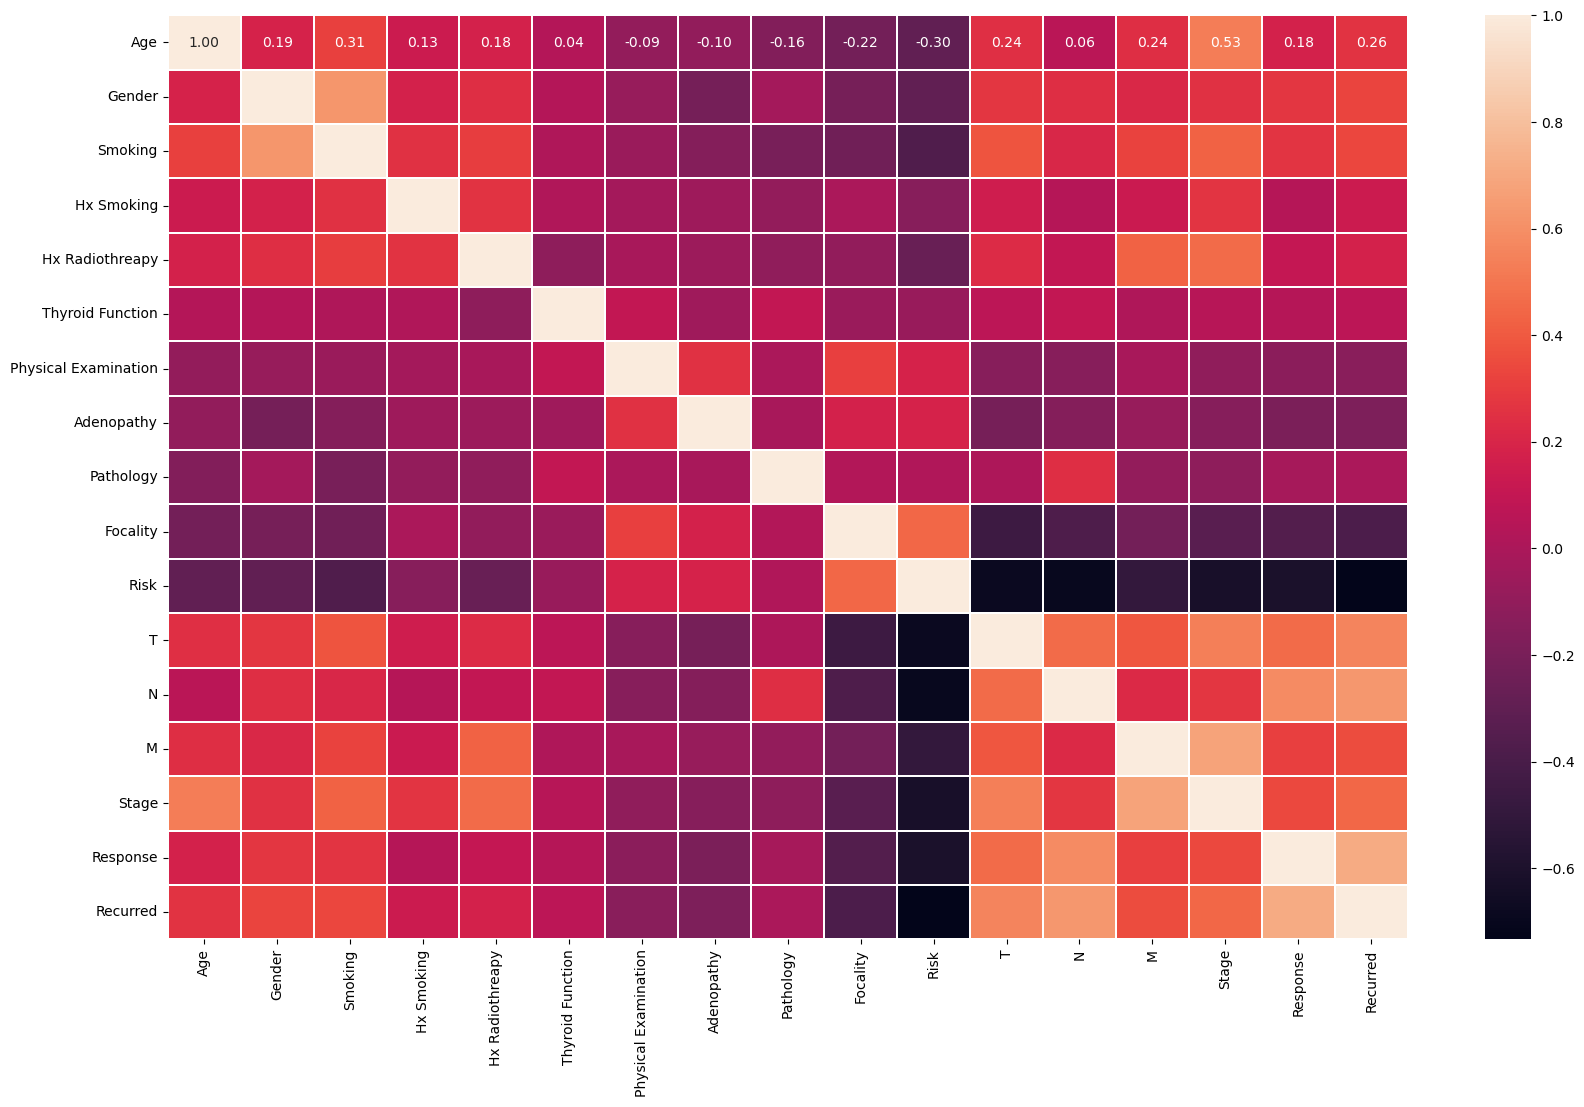

In [129]:
# Let's assess correlation between all features
plt.figure(figsize=(20, 12))
sns.heatmap(labeled_df_copy.corr(), annot=True, linewidths=.1, fmt=".2f")
plt.show()

**Observations:**
* Risk and response type on the treatment has strong negative and positive linear correlation to reccurence of cancer, respectively
* There is no correlation between target variable and cancer type (pathology)
* Thyroid function, smoking, smoking history has weak correlation with target feature

#### 3.4  Split Data

In [130]:
X = labeled_df_copy.drop(["Recurred", "Hx Radiothreapy"], axis=1)
y = labeled_df_copy["Recurred"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=101)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}\n")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (325, 15)
Shape of x_test: (58, 15)

Shape of y_train: (325,)
Shape of y_test: (58,)


In [131]:
folds = StratifiedKFold(n_splits=5)
algorithm_names = ["SVC", "Random Forest", "XGBoost", "AdaBoost", "GradientBoost", "Decision Tree"]
algorithms = [SVC(), 
              RandomForestClassifier(), 
              XGBClassifier(), 
              AdaBoostClassifier(), 
              GradientBoostingClassifier(),
              DecisionTreeClassifier()]

cv_scores = []

for clf in algorithms:
    cv_scores.append(cross_val_score(clf, x_train, y_train, cv=folds))
    
scorings = pd.DataFrame(dict(zip(algorithm_names, cv_scores)))
scorings

,SVC,Random Forest,XGBoost,AdaBoost,GradientBoost,Decision Tree
0,0.969231,0.969231,0.969231,0.953846,0.969231,0.953846
1,0.892308,0.953846,0.953846,0.953846,0.938462,0.923077
2,0.938462,0.969231,0.953846,0.953846,0.938462,0.938462
3,1.000000,0.969231,0.984615,1.000000,0.969231,0.953846
4,0.815385,0.861538,0.892308,0.907692,0.892308,0.876923


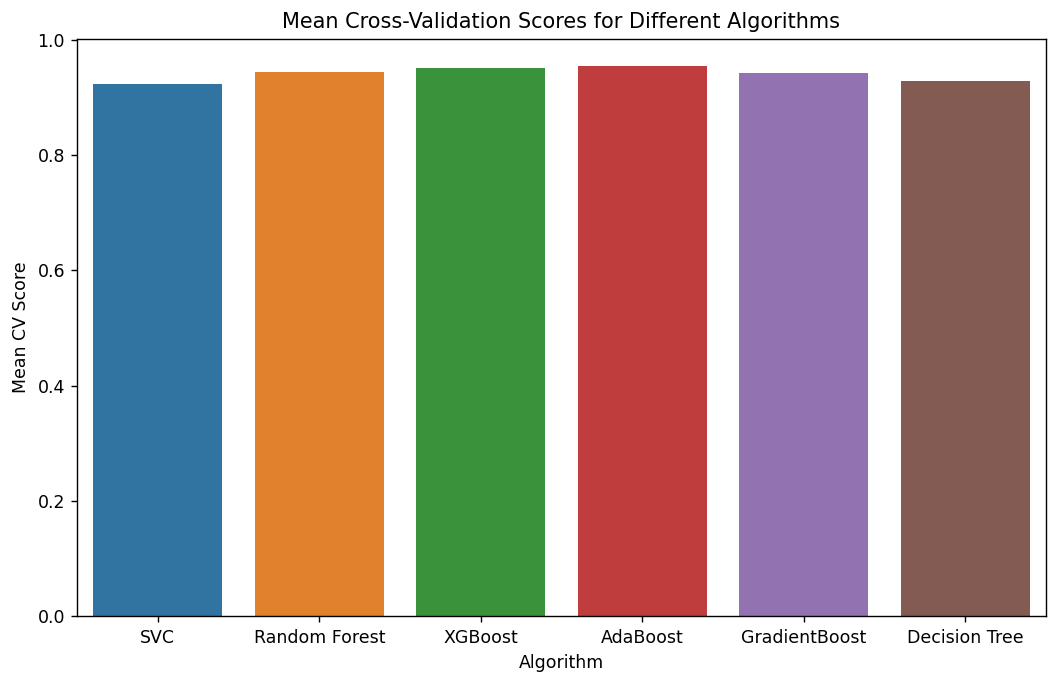

In [132]:
mean_scores = [scores.mean() for scores in cv_scores]

scorings = pd.DataFrame({'Algorithm': algorithm_names, 
                         'Mean CV Score': mean_scores})

plt.figure(figsize=(10, 6), dpi=125)
sns.barplot(x='Algorithm', y='Mean CV Score', data=scorings)
plt.title('Mean Cross-Validation Scores for Different Algorithms')
plt.show()


At that standpoint we used 6 **machine learning models**
* Random Forest
* AdaBoost
* GradientBoost
* Decision Tree
* XGBoost
All of them had good performance on binary classification, but the best one is **Random Forest**, so let's use it

#### 3.5 Train Model

In [133]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(classification_report(y_pred, y_test))
print(f"Accuracy Score of Random Forest: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score of Random Forest: {f1_score(y_test, y_pred)}")
print(f"Recall Score of Random Forest: {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision Score of Random Forest: {precision_score(y_test, y_pred, average='weighted')}")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.94      1.00      0.97        16

    accuracy                           0.98        58
   macro avg       0.97      0.99      0.98        58
weighted avg       0.98      0.98      0.98        58

Accuracy Score of Random Forest: 0.9827586206896551
F1 Score of Random Forest: 0.9696969696969697
Recall Score of Random Forest: 0.9827586206896551
Precision Score of Random Forest: 0.9831691297208539


F1 score is incredibely high (0.98), so there is no need to fine tune hyperparameters using grid search, let's focus more on feature importance

#### 3.6 Evaluate

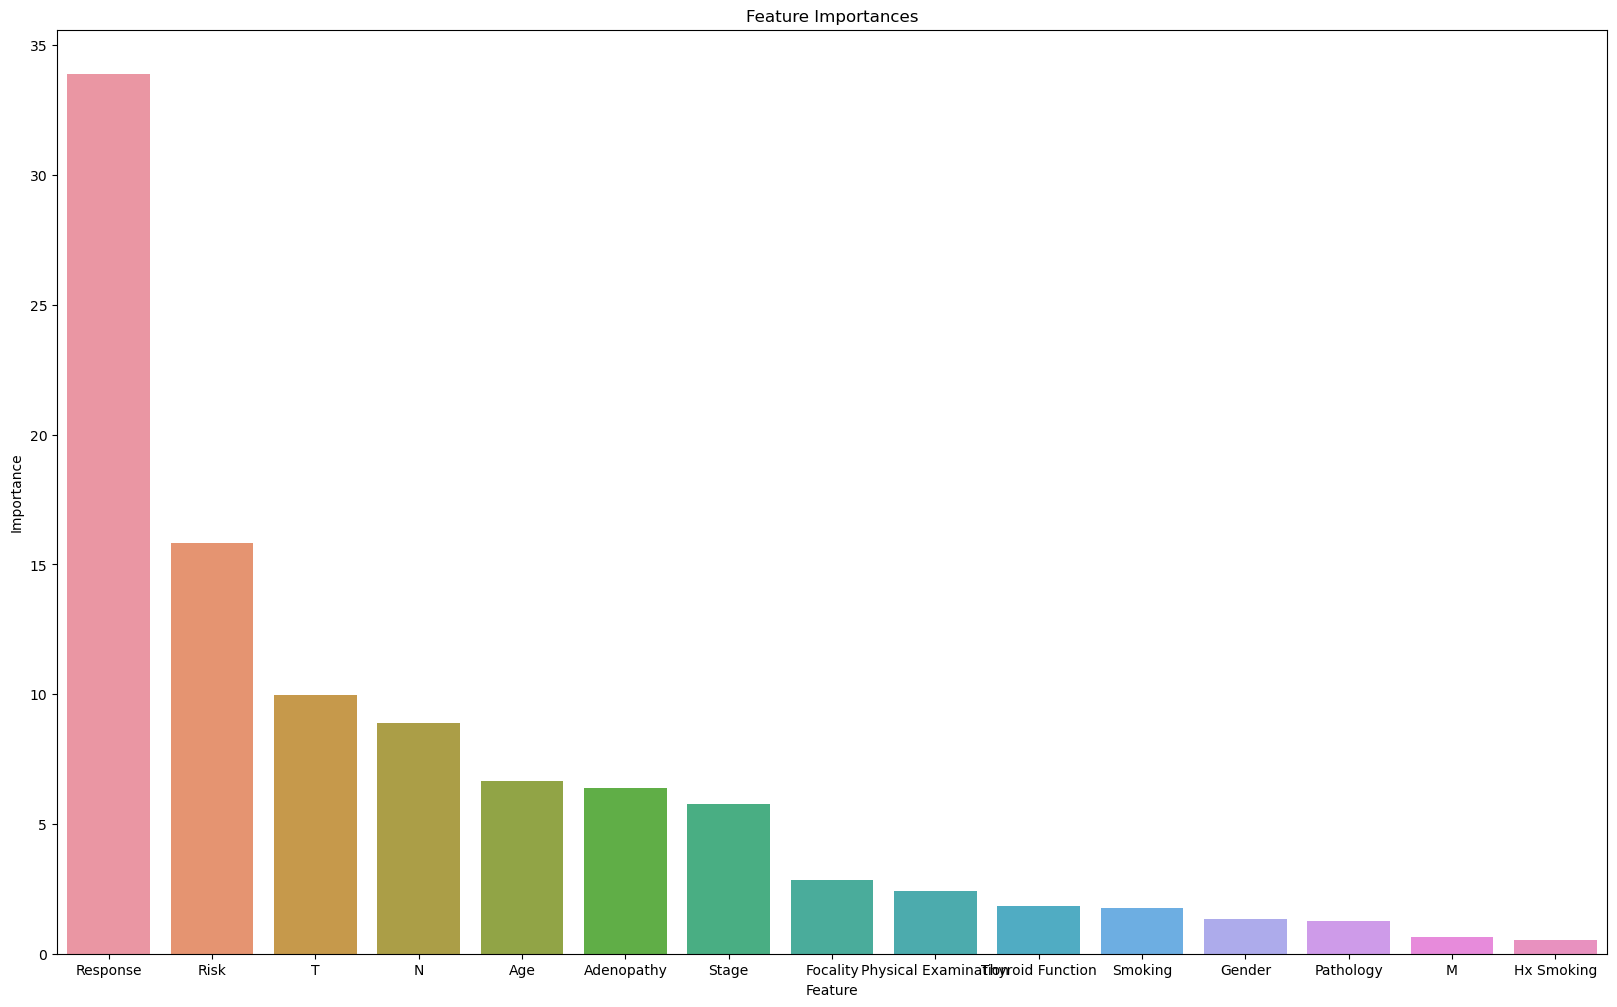

In [134]:
feature_importance = pd.DataFrame(x_train.columns, columns=["Feature"])
feature_importance["Importance"] = rf.feature_importances_ * 100
feature_importance.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(20, 12))
sns.barplot(data=feature_importance, x="Feature", y="Importance")
plt.title("Feature Importances")
plt.xticks(rotation=0)

plt.show()

**Observations:**
* There are 6 major factors affecting positive/negative recurrence as was shown in Exploratory Data Analysis and correlation matrix, e.g. reponse, risk, tumor, lymph nodal classifications as well as age and presence of adenopathy
* Smoking (history), cancer type, cancer metastasis type, thyroid function have the lowest importance among all features. 

*Hence, you can keep smoking without any concerns towards your thyroid, but be careful with other organs...*

In [135]:
# Save model using pickle
file_model = open("model.pkl", 'wb')
pickle.dump(rf, file_model)
file_model.close()